In [374]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [375]:
df = pd.read_csv('tubedata.csv', header=None)
df.columns=['StartingStation', 'EndingStation', 'TubeLine', 'AverageTimeTaken', 'MainZone', 'SecondaryZone']
df.head()

,StartingStation,EndingStation,TubeLine,AverageTimeTaken,MainZone,SecondaryZone
0,Harrow & Wealdstone,Kenton,Bakerloo,3,5,0
1,Kenton,South Kenton,Bakerloo,2,4,0
2,South Kenton,North Wembley,Bakerloo,2,4,0
3,North Wembley,Wembley Central,Bakerloo,2,4,0
4,Wembley Central,Stonebridge Park,Bakerloo,3,4,0


In [376]:
station_dict = defaultdict(list)
zone_dict = defaultdict(set)

In [377]:
for index, row in df.iterrows():
  
  start_station = row.iloc[0]
  end_station = row.iloc[1]
  act_cost = int(row.iloc[3])
  tube_line = row.iloc[2]

  zone1 = row.iloc[4]
  zone2 = row.iloc[5]

  # station dictionary of child station tuples (child_name, cost from parent to the child)
  station_list = station_dict[start_station]
  station_list.append((end_station, act_cost, tube_line))

  # the following two lines add the other direction of the tube "step"
  station_list = station_dict[end_station]
  station_list.append((start_station, act_cost, tube_line))
  
  # we add the main zone
  zone_dict[start_station].add(zone1)
  # we add the secondary zone
  if zone2 != "0":
    zone_dict[start_station].add(zone2)
    # if the secondary zone is not 0 it's the main zone for the ending station
    zone_dict[end_station].add(zone2)
  else:
    # otherwise the main zone for the ending station is the same as for the starting station
    zone_dict[end_station].add(zone1)

In [378]:
station_dict

defaultdict(list,
            {'Harrow & Wealdstone': [('Kenton', 3, 'Bakerloo')],
             'Kenton': [('Harrow & Wealdstone', 3, 'Bakerloo'),
              ('South Kenton', 2, 'Bakerloo')],
             'South Kenton': [('Kenton', 2, 'Bakerloo'),
              ('North Wembley', 2, 'Bakerloo')],
             'North Wembley': [('South Kenton', 2, 'Bakerloo'),
              ('Wembley Central', 2, 'Bakerloo')],
             'Wembley Central': [('North Wembley', 2, 'Bakerloo'),
              ('Stonebridge Park', 3, 'Bakerloo')],
             'Stonebridge Park': [('Wembley Central', 3, 'Bakerloo'),
              ('Harlesden', 2, 'Bakerloo')],
             'Harlesden': [('Stonebridge Park', 2, 'Bakerloo'),
              ('Willesden Junction', 2, 'Bakerloo')],
             'Willesden Junction': [('Harlesden', 2, 'Bakerloo'),
              ('Kensal Green', 3, 'Bakerloo')],
             'Kensal Green': [('Willesden Junction', 3, 'Bakerloo'),
              ("Queen's Park", 3, 'Bakerloo')],
 

In [379]:
zone_dict

defaultdict(set,
            {'Harrow & Wealdstone': {'5'},
             'Kenton': {'4', '5'},
             'South Kenton': {'4'},
             'North Wembley': {'4'},
             'Wembley Central': {'4'},
             'Stonebridge Park': {'3', '4'},
             'Harlesden': {'3'},
             'Willesden Junction': {'3'},
             'Kensal Green': {'2', '3'},
             "Queen's Park": {'2'},
             'Kilburn Park': {'2'},
             'Maida Vale': {'2'},
             'Warwick Avenue': {'2'},
             'Paddington': {'1', '2'},
             'Edgware Road': {'1'},
             'Marylebone': {'1'},
             'Baker Street': {'1', '2'},
             "Regent's Park": {'1'},
             'Oxford Circus': {'1'},
             'Piccadilly Circus': {'1'},
             'Charing Cross': {'1'},
             'Embankment': {'1'},
             'Waterloo': {'1'},
             'Lambeth North': {'1'},
             'Elephant & Castle': {'1', '2'},
             'West Ruislip': {'6'},
 

In [380]:
# created a nxgraph object
def generate_nx_graph(graph_dict):
    nx_graph = nx.Graph()

    for path, connected_nodes in graph_dict.items():
        for connected_node in connected_nodes:
            nx_graph.add_edge(connected_node, connected_node[0], weight=connected_node[1], tubeline=connected_node[2])
    return nx_graph

In [381]:
station_nx_graph = generate_nx_graph(station_dict)

In [382]:
# created a different nxgraph object
import networkx as nx
tube_data =nx.Graph()
for index, row in df.iterrows():
    tube_data.add_edge(row.iloc[0], row.iloc[1], weight=int(row.iloc[3]), tube_line=row.iloc[2], mainZone=row.iloc[4], secondaryZone=row.iloc[5])

In [383]:
test_paths = [
    ('Euston', 'Victoria'),
    ('Canada Water', 'Stratford'), 
    ('New Cross Gate', 'Stepney Green'), 
    ('Ealing Broadway', 'South Kensington'), 
    ('Baker Street', 'Wembley Park')
]

In [384]:
# utility function to compute the total time taken for a given path
def avg_time_taken(path_from_root):
    time_taken = 0
    for i in range(len(path_from_root)):
        if i<len(path_from_root)-1:
            for destination in station_dict[path_from_root[i]]:
                if destination[0] == path_from_root[i+1]: 
                    time_taken += destination[1]
                    break
    return int(time_taken)

In [385]:
def show_weighted_graph(networkx_graph, node_size, font_size, fig_size):
  # Allocate the given fig_size in order to have space for each node
  plt.figure(num=None, figsize=fig_size, dpi=80)
  plt.axis('off')
  # Compute the position of each vertex in order to display it nicely
  nodes_position = nx.spring_layout(networkx_graph)
  # You can change the different layouts depending on your graph
  # Extract the weights corresponding to each edge in the graph
  edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
  # Draw the nodes (you can change the color)
  nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,
                         node_color = ["orange"]*networkx_graph.number_of_nodes())
  # Draw only the edges
  nx.draw_networkx_edges(networkx_graph, nodes_position,
                         edgelist=list(networkx_graph.edges), width=2)
  # Add the weights
  nx.draw_networkx_edge_labels(networkx_graph, nodes_position,
                               edge_labels = edges_weights)
  # Add the labels of the nodes
  nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size,
                          font_family='sans-serif')
  plt.axis('off')
  plt.show()


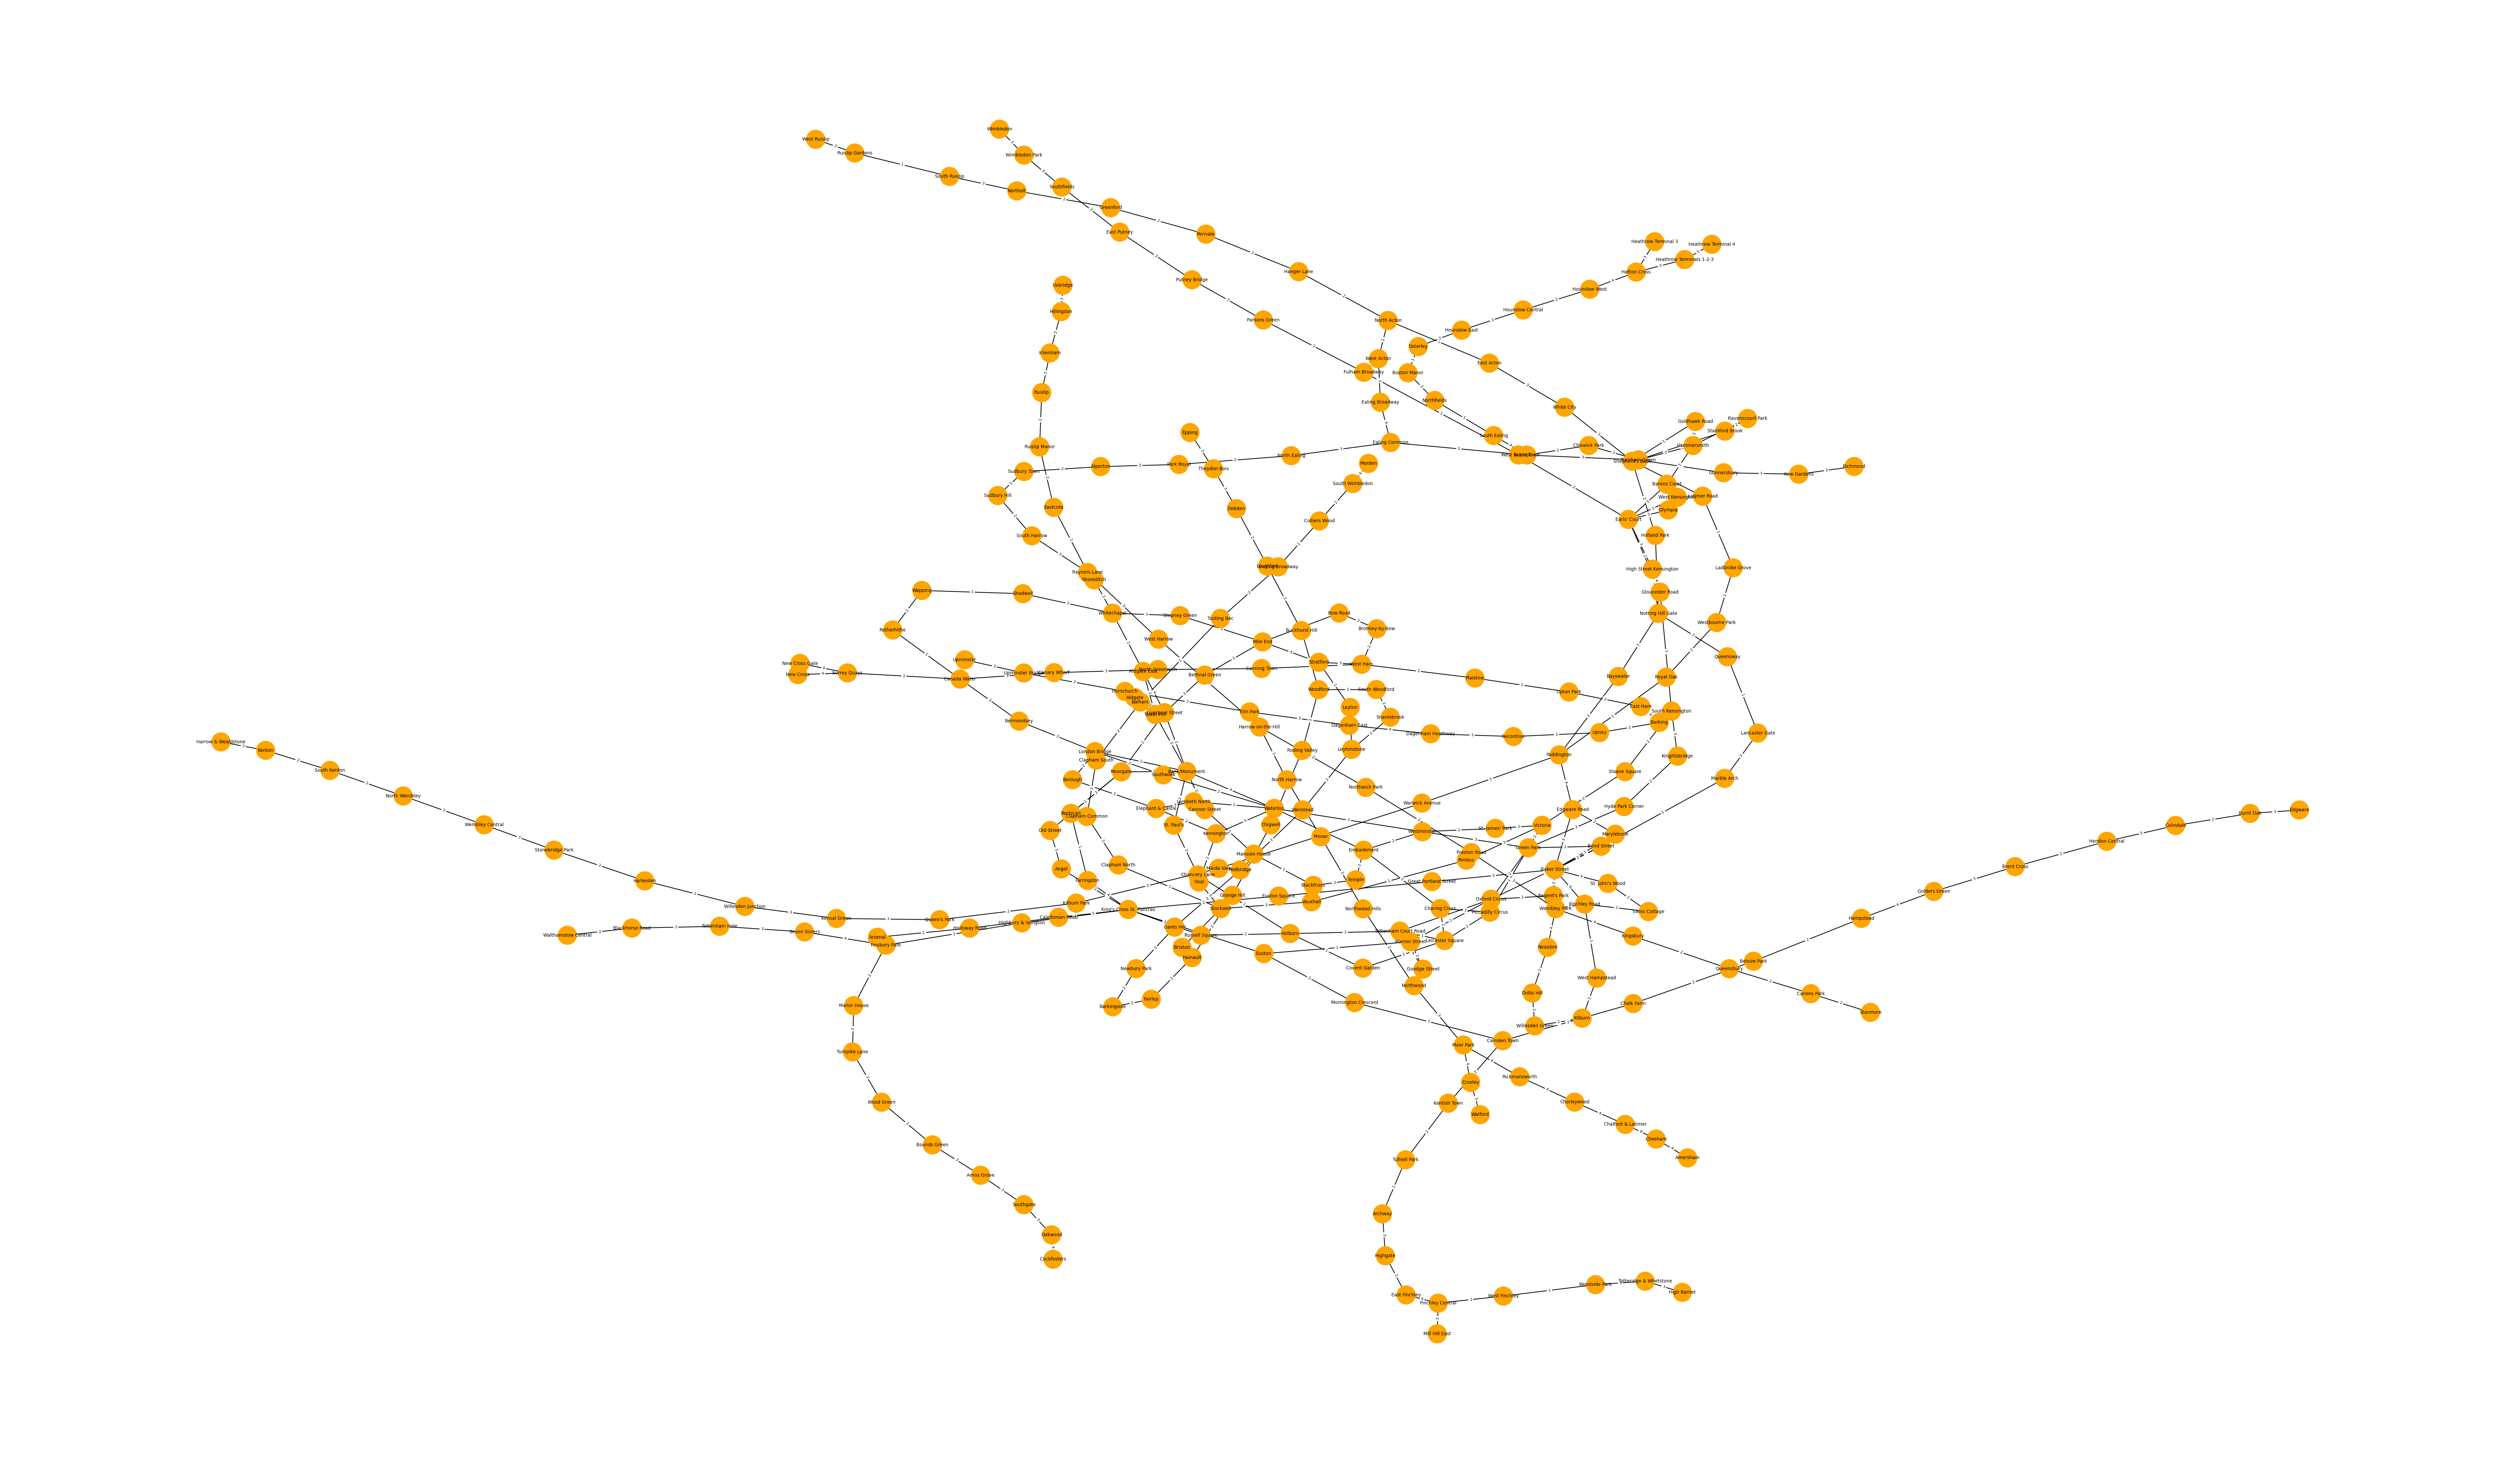

In [386]:
show_weighted_graph(tube_data, 2500, 12, (120,70))

## Iterative DFS

In [387]:
# utility function to costruct path from a given node

def construct_path_from_root(node):
    """the non-recursive way!"""
    path_from_root = [node['label']]
    # path_from_root.append(node['label'])
    while node['parent']:
        node = node['parent']
        path_from_root = [node['label']] + path_from_root
    return path_from_root

In [388]:
def my_depth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    """the no-oop way!"""

    frontier = [{'label':initial, 'parent':None}]
    explored = {initial}
    number_of_explored_nodes = 0

    while frontier:
        node = frontier.pop() # pop from the right of the list
        number_of_explored_nodes += 1
        if node['label']==goal:
            if compute_exploration_cost:
                print('number of explorations = {}'.format(number_of_explored_nodes))
            return node

        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])
        
        for child_label in neighbours:
            child = {'label':child_label, 'parent':node}
            if child_label not in explored:
                frontier.append(child) # added to the right of the list, so it is a LIFO
                explored.add(child_label)
    return None

In [389]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    solution = my_depth_first_graph_search(tube_data, _[0], _[1], compute_exploration_cost=True, reverse=False)
    path_from_root = construct_path_from_root(solution)
    print(f'Path: {path_from_root}, \nAverage time taken: {avg_time_taken(path_from_root)}')

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 25
Path: ['Euston', "King's Cross St. Pancras", 'Russell Square', 'Holborn', 'Covent Garden', 'Leicester Square', 'Piccadilly Circus', 'Green Park', 'Victoria'], 
Average time taken: 13
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 6
Path: ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 
Average time taken: 15
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 32
Path: ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford', 'Mile End', 'Stepney Green'], 
Average time taken: 27
___________________________________('Ealing Broadway', 'South Kensington')____________________

In [390]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    solution = my_depth_first_graph_search(tube_data, _[0], _[1], compute_exploration_cost=True, reverse=True)
    path_from_root = construct_path_from_root(solution)
    print(f'Path: {path_from_root}, \nAverage time taken: {avg_time_taken(path_from_root)}')

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 221
Path: ['Euston', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 'Holborn', 'Chancery Lane', "St. Paul's", 'Bank/Monument', 'Cannon Street', 'Mansion House', 'Blackfriars', 'Temple', 'Embankment', 'Charing Cross', 'Piccadilly Circus', 'Green Park', 'Victoria'], 
Average time taken: 24
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 227
Path: ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Aldgate East', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford'], 
Average time taken: 20
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 267
Path: ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel',

## Iterative BFS

In [391]:

def my_breadth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    number_of_explored_nodes = 0
    frontier = [{'label':initial, 'parent':None}]
    explored = {initial}

    while frontier:
        node = frontier.pop() # pop from the right of the list
        number_of_explored_nodes += 1

        # goal check
        if node['label']==goal:
            if compute_exploration_cost:
                print('number of explorations = {}'.format(number_of_explored_nodes))
            return node

        neighbours = reversed(list(nxobject.neighbors(node['label']))) if reverse else nxobject.neighbors(node['label'])

        for child_label in neighbours:
            child = {'label':child_label, 'parent':node}
            if child_label not in explored:
                frontier = [child] + frontier # added to the left of the list, so a FIFO!
                explored.add(child_label)
    return None

In [392]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    solution = my_breadth_first_graph_search(tube_data, _[0], _[1], compute_exploration_cost=True, reverse=True)
    path_from_root = construct_path_from_root(solution)
    print(f'Path: {path_from_root} \nAverage time taken: {avg_time_taken(path_from_root)}')

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 34
Path: ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'] 
Average time taken: 7
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 25
Path: ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'] 
Average time taken: 15
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 40
Path: ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'] 
Average time taken: 14
___________________________________('Ealing Broadway', 'South Kensington')_____________________________________________
number of explorations = 47
Path: ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham

In [393]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    solution = my_breadth_first_graph_search(tube_data, _[0], _[1], compute_exploration_cost=True, reverse=False)
    path_from_root = construct_path_from_root(solution)
    print(f'Path: {path_from_root}, \nAverage time taken: {avg_time_taken(path_from_root)}')

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 35
Path: ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'], 
Average time taken: 7
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 40
Path: ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 
Average time taken: 15
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 26
Path: ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'], 
Average time taken: 14
___________________________________('Ealing Broadway', 'South Kensington')_____________________________________________
number of explorations = 50
Path: ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turn

## UCS

In [394]:
def my_uniform_cost_search(nxobject, initial, goal, reverse): 
    visited_nodes = {} 
    visited_nodes[initial] = (0, [initial]) 
    paths_to_explore = PriorityQueue()
    paths_to_explore.put((0, [initial]))
    number_of_explored_nodes = 0

    while not paths_to_explore.empty():

        total_cost, path = paths_to_explore.get()
        number_of_explored_nodes += 1
        curr_node=path[-1]
        
        if curr_node==goal:
            print('number of explorations = {}'.format(number_of_explored_nodes))
            return visited_nodes[goal]

                
        neighbors = reversed(list(nxobject.neighbors(curr_node))) if reverse else nxobject.neighbors(curr_node)
        
        for neighbor in neighbors:
            edge_data = nxobject.get_edge_data(path[-1], neighbor)
            new_cost = total_cost + edge_data['weight']

            if (neighbor not in visited_nodes) or (visited_nodes[neighbor][0]>new_cost):
                next_node = (new_cost, path+[neighbor])
                visited_nodes[neighbor] = next_node                
                paths_to_explore.put(next_node)

    return visited_nodes[goal]

In [395]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    avg_time, path = my_uniform_cost_search(tube_data, _[0], _[1], reverse=False)
    print(f"Path : {path} \nAverage time taken: {avg_time}")

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 35
Path : ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'] 
Average time taken: 7
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 59
Path : ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford'] 
Average time taken: 14
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 20
Path : ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'] 
Average time taken: 14
___________________________________('Ealing Broadway', 'South Kensington')_____________________________________________
number of explorations = 47
Path : ['Ealing Broadway', 'Ealing Common',

In [396]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    avg_time, path = my_uniform_cost_search(tube_data, _[0], _[1], reverse=True)
    print(f"Path : {path} \nAverage time taken: {avg_time}")

___________________________________('Euston', 'Victoria')_____________________________________________
number of explorations = 35
Path : ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'] 
Average time taken: 7
___________________________________('Canada Water', 'Stratford')_____________________________________________
number of explorations = 59
Path : ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford'] 
Average time taken: 14
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________
number of explorations = 20
Path : ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'] 
Average time taken: 14
___________________________________('Ealing Broadway', 'South Kensington')_____________________________________________
number of explorations = 47
Path : ['Ealing Broadway', 'Ealing Common',

## UCS with tubeline change

In [397]:
# utility function calculate the additional time required for switching the tubeline
def construct_path_from_root_ucs(node, cost):
    path_from_root = [node['label']]
    line = set()
    line.add(node['line'])

    while node['parent']:
        node = node['parent']
        path_from_root = [node['label']] + path_from_root

        if node['line'] == None:
            break
        line.add(node['line'])

    new_cost = cost + (2*(len(line)-1)) if len(line)>1 else cost

    return path_from_root, new_cost, line

In [398]:
def my_uniform_cost_search(initial, goal, calc_exploration_cost):
    visited_nodes = [{'label':initial, 'parent':None, 'cost':0, 'line':None}]
    explored_nodes = [initial]
    num_explored_nodes = 0
    neighbors = []
    
    while visited_nodes:
        # sort the visited list to keep the minimum cost
        visited_nodes = sorted(visited_nodes, key = lambda cost: cost['cost'])

        # pop the node with the lowest cost
        current_node = visited_nodes.pop(0) 
        num_explored_nodes += 1

        if current_node['label'] == goal:
            if calc_exploration_cost:
                print('\nNumber of explorations = {}'.format(num_explored_nodes))
            return current_node

        neighbors = [_ for _ in station_dict[current_node['label']]]

        for child_label in neighbors:
            new_cost = child_label[1]+current_node['cost']
            child = {'label':child_label[0], 'parent': current_node, 'cost':new_cost, 'line':child_label[2]}
            
            if child_label[0] not in explored_nodes:
                visited_nodes.append(child)
                explored_nodes.append(child_label[0])

    return None

In [399]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")
    solution = my_uniform_cost_search(_[0], _[1], True)
    root_path, cost, line = construct_path_from_root_ucs(solution, solution['cost'])
    print('Path :', root_path, '\nCost of travel:', cost, '\nTubelines switched:', line)


___________________________________('Euston', 'Victoria')_____________________________________________

Number of explorations = 30
Path : ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'] 
Cost of travel: 9 
Tubelines switched: {'Northern', 'Victoria'}
___________________________________('Canada Water', 'Stratford')_____________________________________________

Number of explorations = 52
Path : ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford'] 
Cost of travel: 18 
Tubelines switched: {'District', 'East London', 'Central'}
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________

Number of explorations = 18
Path : ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'] 
Cost of travel: 16 
Tubelines switched: {'District', 'East London'}
___________________________________('Ealing B

## Best First Search

In [400]:
import heapq

#  adding heuristics reduces the number of the nodes explored as heuristic cost is calulated from the goal node to the current node.
def heuristic(current_node, goal_node):
    heuristic_dist = []
    if len(zone_dict[current_node]):
        for curr_zone in zone_dict[current_node]: 
            for goal_zone in zone_dict[goal_node]:
                if current_node == goal_node:
                    return 0
                elif goal_zone == curr_zone:
                    return 1
                else:
                    # absolute diffrence between zone numbers
                    heuristic_dist.append(abs(int(goal_zone) - int(curr_zone)))

    return min(heuristic_dist)

def best_first_search(graph, start, goal):
    visited = set()
    priority_queue = [(heuristic(start, goal), start, [])]
    num_explored_nodes = 0

    while priority_queue:
        # using heapq as priority queue
        (heuristic_cost, current_node, path) = heapq.heappop(priority_queue)
        num_explored_nodes += 1

        if current_node not in visited:
            visited.add(current_node)
            path = path + [current_node]

            if current_node == goal:
                print('\nNumber of explorations = {}'.format(num_explored_nodes))
                return path

            for neighbor, _, _ in graph[current_node]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (heuristic(neighbor, goal), neighbor, path))
    return None

In [401]:
for _ in test_paths:
    print(f"___________________________________{_}_____________________________________________")   
    solution = best_first_search(station_dict, _[0], _[1])
    print(f"Path: {solution} \nAverage time taken {avg_time_taken(solution)}")

___________________________________('Euston', 'Victoria')_____________________________________________

Number of explorations = 25
Path: ['Euston', "King's Cross St. Pancras", 'Euston Square', 'Great Portland Street', 'Baker Street', 'Bond Street', 'Green Park', 'Victoria'] 
Average time taken 15
___________________________________('Canada Water', 'Stratford')_____________________________________________

Number of explorations = 22
Path: ['Canada Water', 'Bermondsey', 'London Bridge', 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stratford'] 
Average time taken 18
___________________________________('New Cross Gate', 'Stepney Green')_____________________________________________

Number of explorations = 24
Path: ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Bermondsey', 'London Bridge', 'Bank/Monument', 'Liverpool Street', 'Bethnal Green', 'Mile End', 'Stepney Green'] 
Average time taken 22
___________________________________('Ealing Broadway', 'South Kensi